# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.neural_network import MLPRegressor
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, acf, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot
from scipy import signal
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsRegressor

%matplotlib inline

pd.set_option('display.max_columns', None)

# Reading the Data

In [2]:
df = pd.read_csv('regression_data.csv')

# Exploratory Data Analysis (EDA)

- check column names
- check data shape
- check duplicates
- check null values
- check data types
- visualise the data 

In [3]:
df.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition1', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'latitude',
       'longitude', 'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition1     21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  latitude       21597 non-null  float64
 17  longitude      21597 non-null  float64
 18  sqft_l

In [5]:
df.head(10)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition1,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,latitude,longitude,sqft_living15,sqft_lot15,price
0,1000102,16/09/2014,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,280000
1,1000102,22/04/2015,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,300000
2,1200019,08/05/2014,4,1.75,2060,26036,1.0,0,0,4,8,1160,900,1947,0,98166,47.4444,-122.351,2590,21891,647500
3,1200021,11/08/2014,3,1.00,1460,43000,1.0,0,0,3,7,1460,0,1952,0,98166,47.4434,-122.347,2250,20023,400000
4,2800031,01/04/2015,3,1.00,1430,7599,1.5,0,0,4,6,1010,420,1930,0,98168,47.4783,-122.265,1290,10320,235000
5,3600057,19/03/2015,4,2.00,1650,3504,1.0,0,0,3,7,760,890,1951,2013,98144,47.5803,-122.294,1480,3504,402500
6,3600072,30/03/2015,4,2.75,2220,5310,1.0,0,0,5,7,1170,1050,1951,0,98144,47.5801,-122.294,1540,4200,680000
7,3800008,24/02/2015,5,1.50,1990,18200,1.0,0,0,3,7,1990,0,1960,0,98178,47.4938,-122.262,1860,8658,178000
8,5200087,09/07/2014,4,2.50,2540,5001,2.0,0,0,3,9,2540,0,2005,0,98108,47.5423,-122.302,2360,6834,487000
9,6200017,12/11/2014,3,1.00,1340,21336,1.5,0,0,4,5,1340,0,1945,0,98032,47.4023,-122.273,1340,37703,281000


In [6]:
df.shape 

(21597, 21)

In [7]:
df.nunique()

id               21420
date               372
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition1           5
grade               11
sqft_above         942
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
latitude          5033
longitude          751
sqft_living15      777
sqft_lot15        8682
price             3622
dtype: int64

The duplicates make sense aside from the duplicate ids. When looking deeper into it, it seems that id is dependent on the number of house transactions and not unique houses. Will keep these duplicates. Thus, no duplicates to remove.

In [8]:
df.isnull().any()  

id               False
date             False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition1       False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
latitude         False
longitude        False
sqft_living15    False
sqft_lot15       False
price            False
dtype: bool

In [9]:
df.yr_renovated.value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

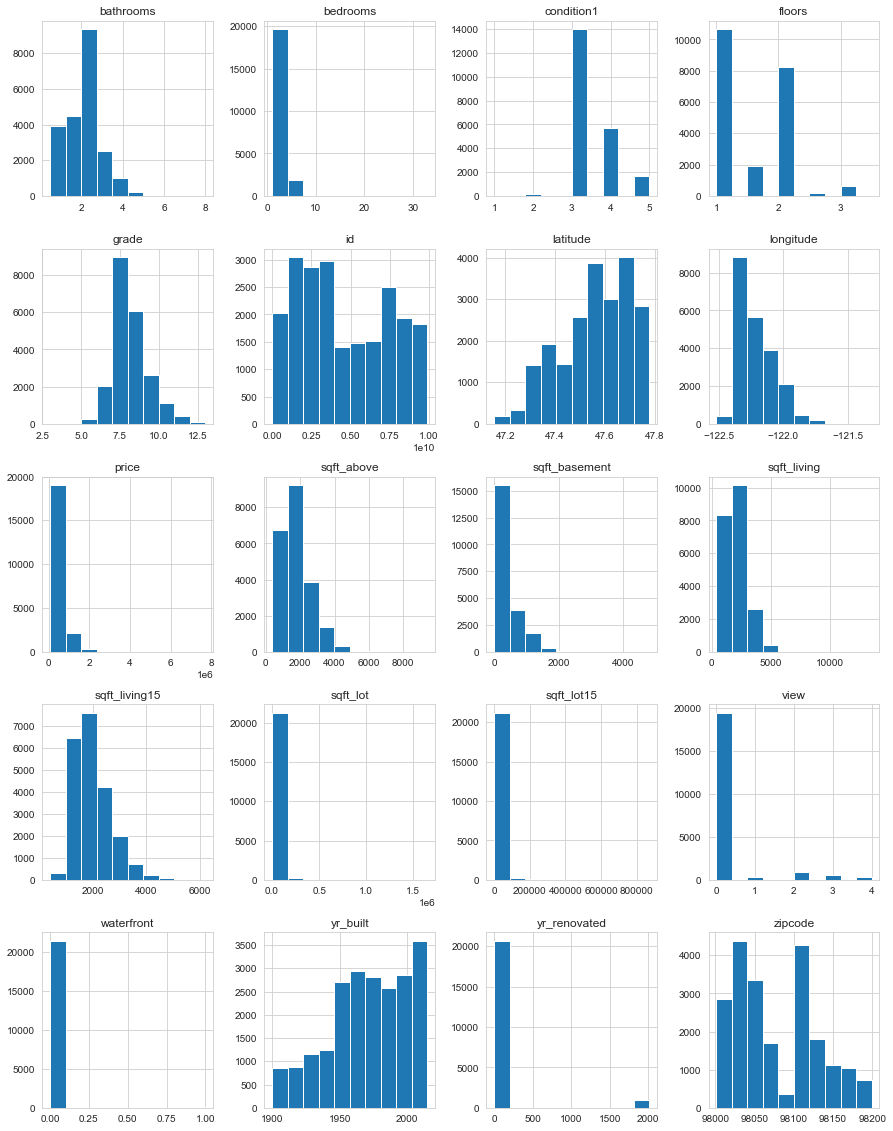

In [10]:
df.hist(figsize = (15,20));

### Initial observations:

- Date is the only categorical variable. It does not seem to be useful as it is the date the house was sold (not the date the house was built, as one would expect). Thus, I may drop this.
- latitude/zipcode and zipcode are redundant. I think I will drop lat/long, treat zipcode as a string, and encode it for the model. 
- yr_renovated seems to have a lot of 0's. May turn this to a boolean like waterfront (0 hasn't been renovated, 1 if it has been).

# (Basic) feature engineering
In this section, we will do basic adjustments to the original dataset.

- dropping columns: ID, date, latitude, longitude
- adding a column: renovated (yes or no), the age of the house (as opposed to year built)
- dropping the yr_rennovated, and yr_built columns
- resetting the index

In [11]:
df=df.drop(['id', 'date', 'latitude', 'longitude'], axis=1)
df.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition1', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'price'],
      dtype='object')

In [12]:
df['property_age']= 2016 - df['yr_built']
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition1,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,property_age
0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,2060,7316,280000,25
1,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,2060,7316,300000,25
2,4,1.75,2060,26036,1.0,0,0,4,8,1160,900,1947,0,98166,2590,21891,647500,69
3,3,1.00,1460,43000,1.0,0,0,3,7,1460,0,1952,0,98166,2250,20023,400000,64
4,3,1.00,1430,7599,1.5,0,0,4,6,1010,420,1930,0,98168,1290,10320,235000,86


In [13]:
df['renovated'] = np.where(df['yr_renovated']>0, 1, 0)

In [14]:
df.drop(['yr_renovated'], axis =1, inplace=True)

In [15]:
df.drop(['yr_built'], axis =1, inplace=True)

In [17]:
df.head(20)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition1,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,price,property_age,renovated
0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,98002,2060,7316,280000,25,0
1,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,98002,2060,7316,300000,25,0
2,4,1.75,2060,26036,1.0,0,0,4,8,1160,900,98166,2590,21891,647500,69,0
3,3,1.00,1460,43000,1.0,0,0,3,7,1460,0,98166,2250,20023,400000,64,0
4,3,1.00,1430,7599,1.5,0,0,4,6,1010,420,98168,1290,10320,235000,86,0
5,4,2.00,1650,3504,1.0,0,0,3,7,760,890,98144,1480,3504,402500,65,1
6,4,2.75,2220,5310,1.0,0,0,5,7,1170,1050,98144,1540,4200,680000,65,0
7,5,1.50,1990,18200,1.0,0,0,3,7,1990,0,98178,1860,8658,178000,56,0
8,4,2.50,2540,5001,2.0,0,0,3,9,2540,0,98108,2360,6834,487000,11,0
9,3,1.00,1340,21336,1.5,0,0,4,5,1340,0,98032,1340,37703,281000,71,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21597 non-null  int64  
 1   bathrooms      21597 non-null  float64
 2   sqft_living    21597 non-null  int64  
 3   sqft_lot       21597 non-null  int64  
 4   floors         21597 non-null  float64
 5   waterfront     21597 non-null  int64  
 6   view           21597 non-null  int64  
 7   condition1     21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  int64  
 11  zipcode        21597 non-null  int64  
 12  sqft_living15  21597 non-null  int64  
 13  sqft_lot15     21597 non-null  int64  
 14  price          21597 non-null  int64  
 15  property_age   21597 non-null  int64  
 16  renovated      21597 non-null  int32  
dtypes: float64(2), int32(1), int64(14)
memory usage: 2

In [19]:
df = df.reset_index(drop = True)
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition1,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,price,property_age,renovated
0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,98002,2060,7316,280000,25,0
1,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,98002,2060,7316,300000,25,0
2,4,1.75,2060,26036,1.0,0,0,4,8,1160,900,98166,2590,21891,647500,69,0
3,3,1.00,1460,43000,1.0,0,0,3,7,1460,0,98166,2250,20023,400000,64,0
4,3,1.00,1430,7599,1.5,0,0,4,6,1010,420,98168,1290,10320,235000,86,0


# EDA: Multicollinearity
Check the correlation of independent variables for our model to identify and remove the highly correlated variables

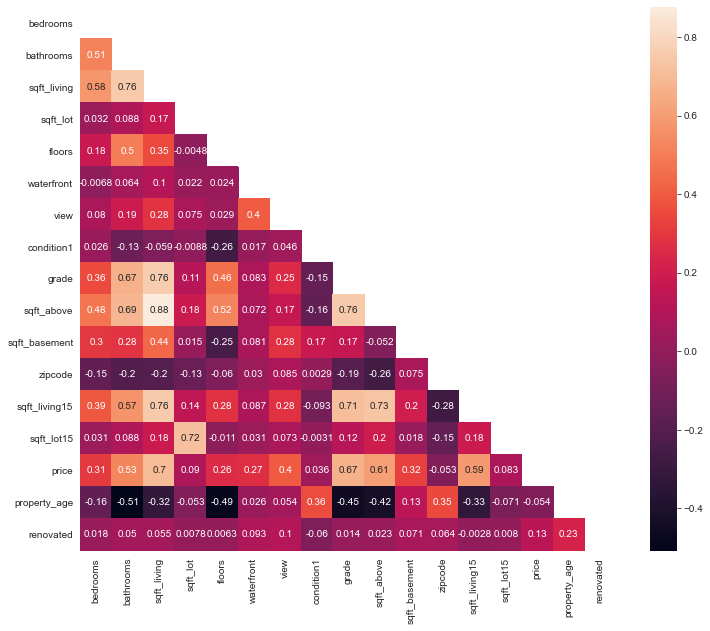

In [20]:
correlations_matrix = df.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

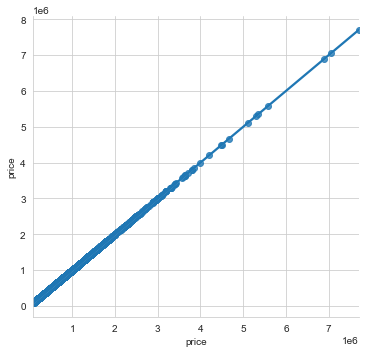

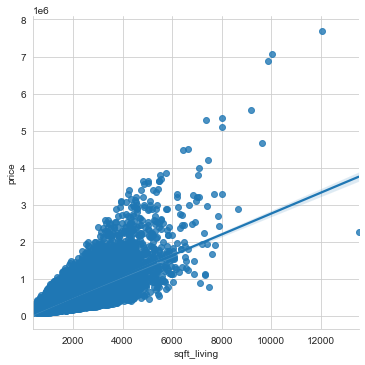

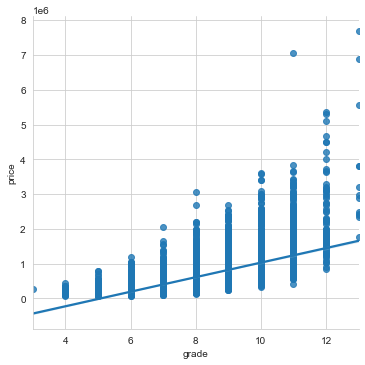

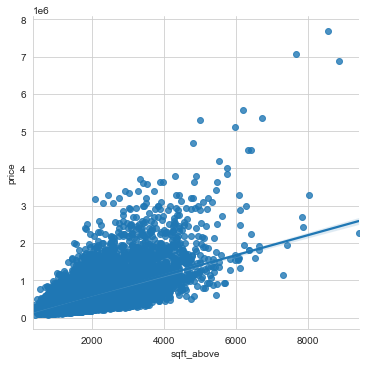

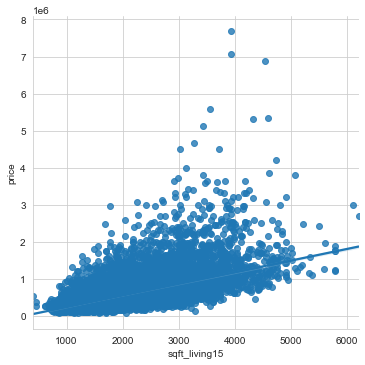

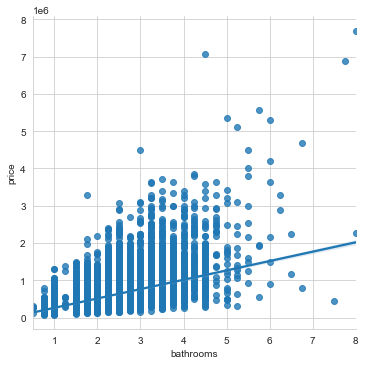

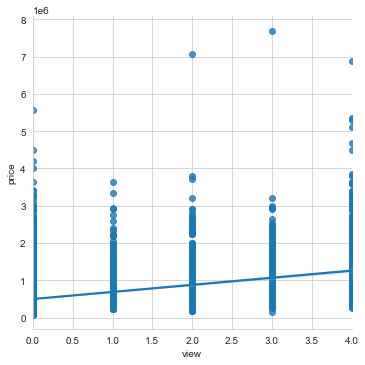

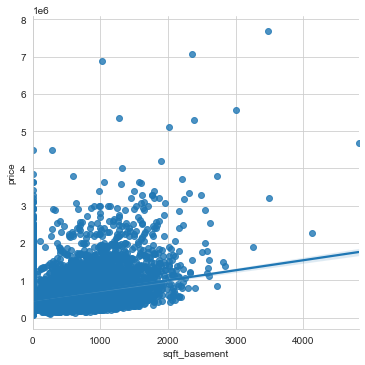

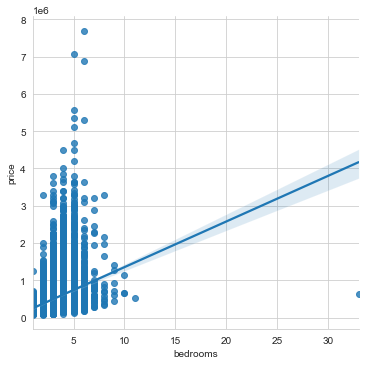

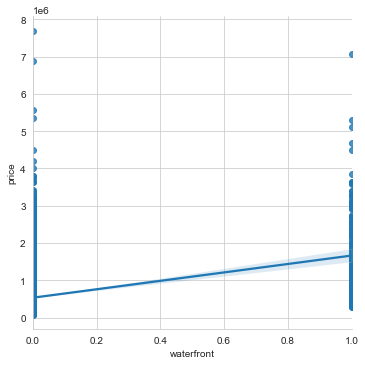

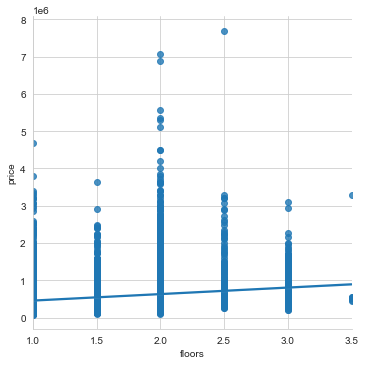

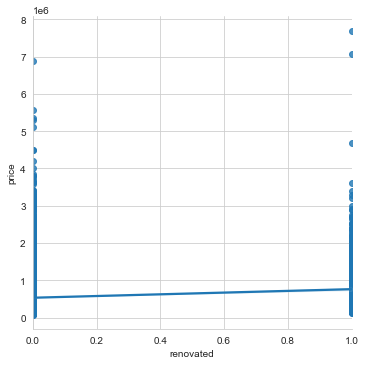

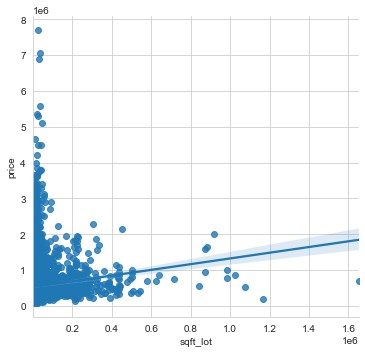

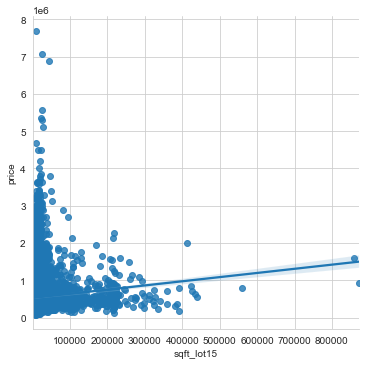

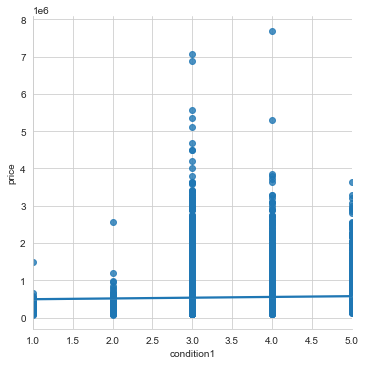

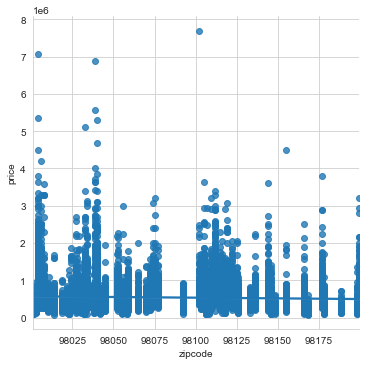

In [21]:
columns = correlations_matrix.nlargest(16,'price').index

for col in columns:
    sns.lmplot(data=df, x=col, y= 'price')
    plt.show()

Decision Multicollinearity : As we can see from the dataset, sqft_living and sqft_above have the highest correlation of 0.88. Thus, we will remove one of the variables.

Decision Outliers : remove outliuers using (super conservative) IQR function


In [22]:
df=df.drop(['sqft_above'], axis=1)

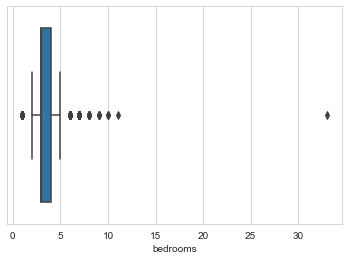

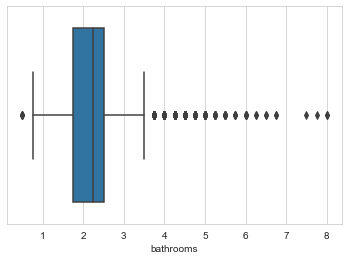

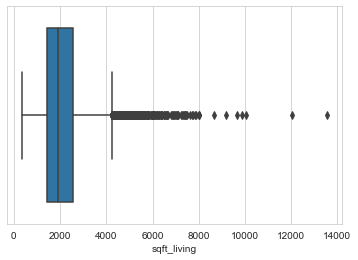

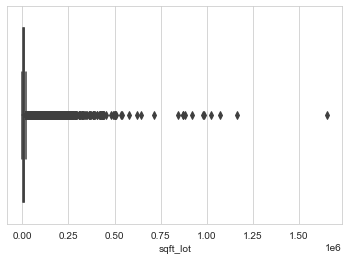

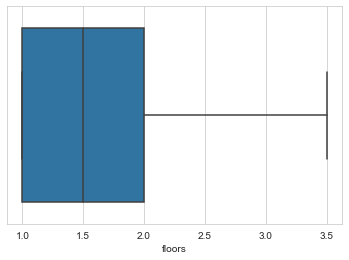

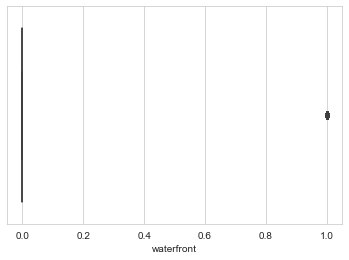

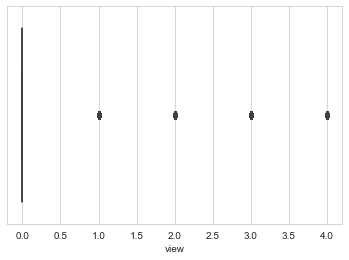

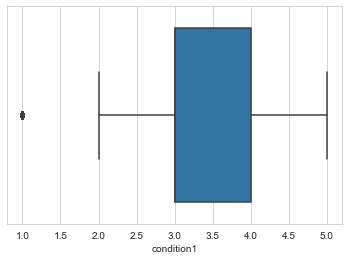

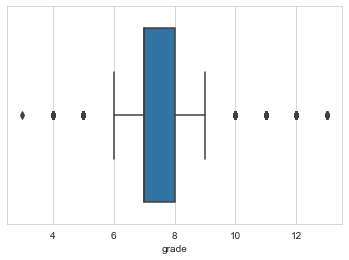

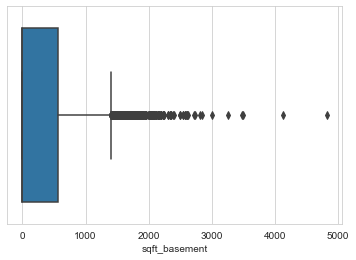

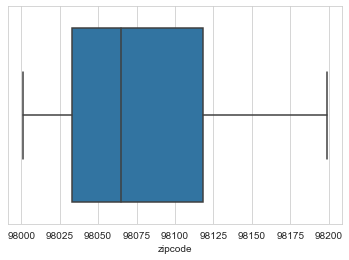

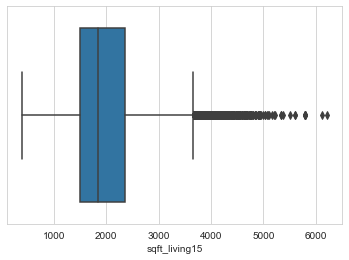

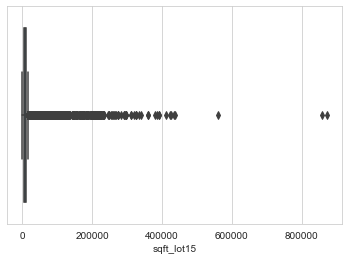

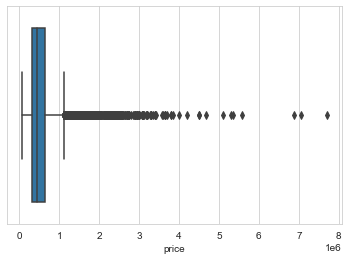

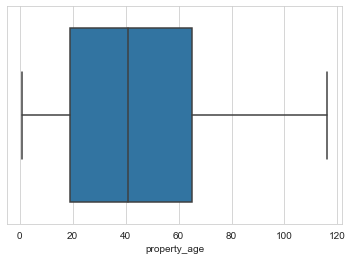

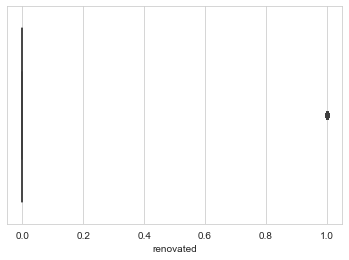

In [23]:
for col in df:
    sns.boxplot (df[col])
    plt.show()

In [24]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (3 * IQR)
 upper_range = Q3 + (3 * IQR)
 return lower_range,upper_range

In [25]:
lowerbound,upperbound = outlier_treatment(df.bathrooms)

In [26]:
df[(df.bathrooms < lowerbound) | (df.bathrooms > upperbound)]
df.drop(df[ (df.bathrooms > upperbound) | (df.bathrooms < lowerbound) ].index , inplace=True)

In [27]:
lowerbound,upperbound = outlier_treatment(df.bedrooms)
df.drop(df[ (df.bedrooms > upperbound) | (df.bedrooms < lowerbound) ].index , inplace=True)

In [28]:
lowerbound,upperbound = outlier_treatment(df.sqft_living)
df.drop(df[ (df.sqft_living > upperbound) | (df.sqft_living < lowerbound) ].index , inplace=True)

In [29]:
lowerbound,upperbound = outlier_treatment(df.sqft_basement)
df.drop(df[ (df.sqft_basement > upperbound) | (df.sqft_basement < lowerbound) ].index , inplace=True)

In [30]:
lowerbound,upperbound = outlier_treatment(df.condition1)
df.drop(df[ (df.condition1 > upperbound) | (df.condition1 < lowerbound) ].index , inplace=True)

In [31]:
len(df)

21458

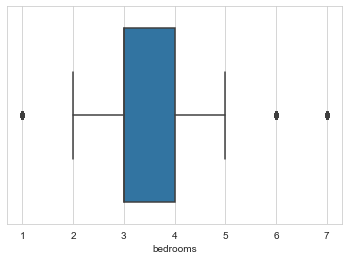

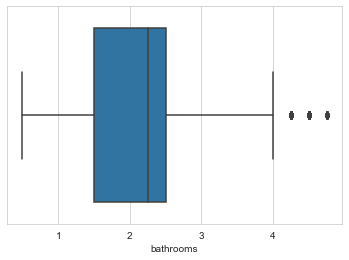

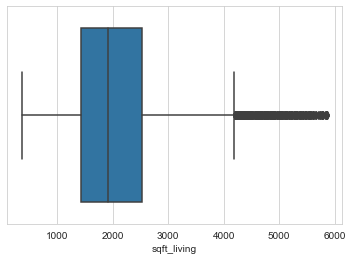

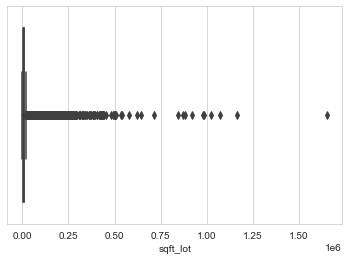

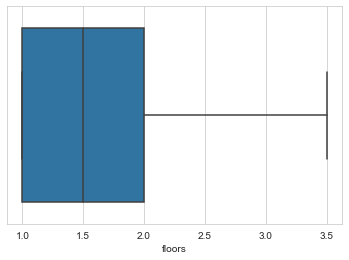

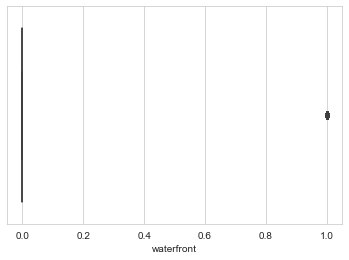

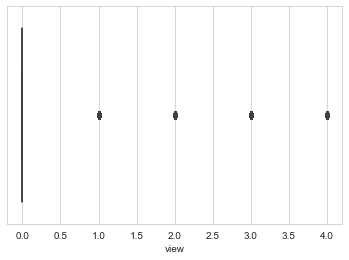

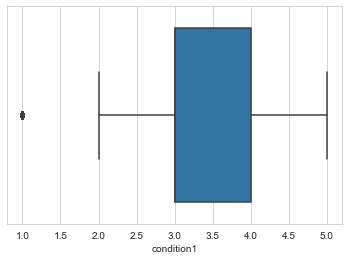

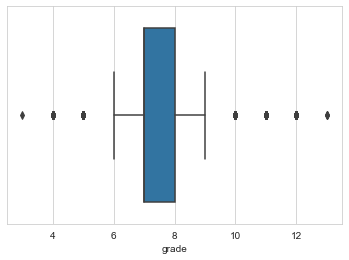

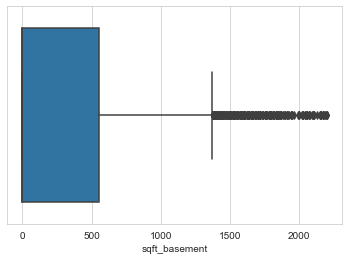

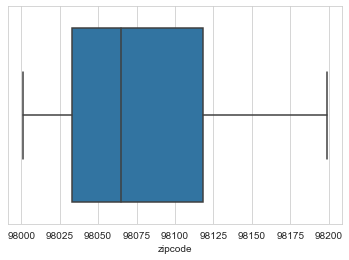

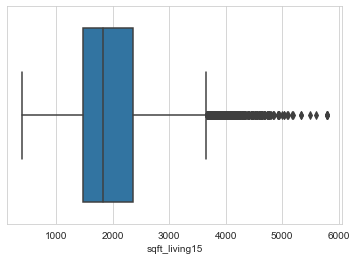

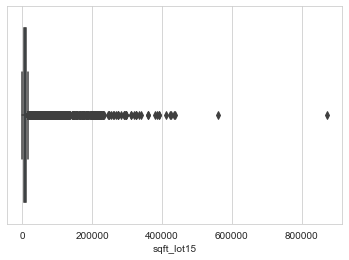

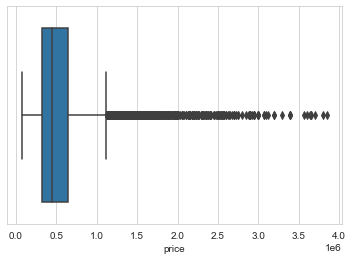

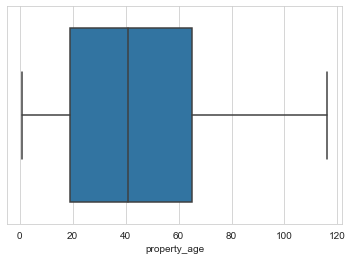

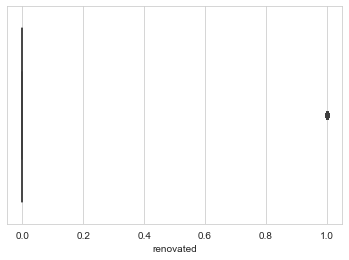

In [32]:
for col in df:
    sns.boxplot (df[col])
    plt.show()

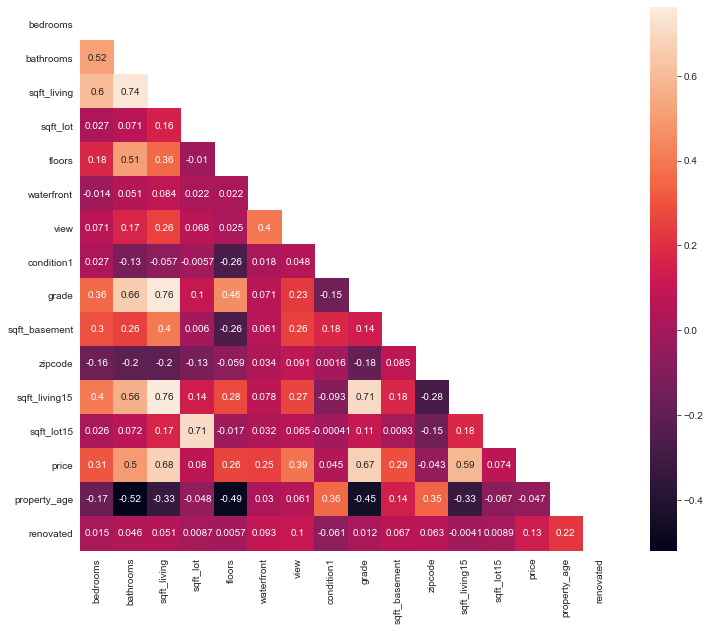

In [33]:
correlations_matrix = df.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [35]:
numerical = df.select_dtypes(np.number)
numerical.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition1,grade,sqft_basement,zipcode,sqft_living15,sqft_lot15,price,property_age,renovated
0,6,3.00,2400,9373,2.0,0,0,3,7,0,98002,2060,7316,280000,25,0
1,6,3.00,2400,9373,2.0,0,0,3,7,0,98002,2060,7316,300000,25,0
2,4,1.75,2060,26036,1.0,0,0,4,8,900,98166,2590,21891,647500,69,0
3,3,1.00,1460,43000,1.0,0,0,3,7,0,98166,2250,20023,400000,64,0
4,3,1.00,1430,7599,1.5,0,0,4,6,420,98168,1290,10320,235000,86,0


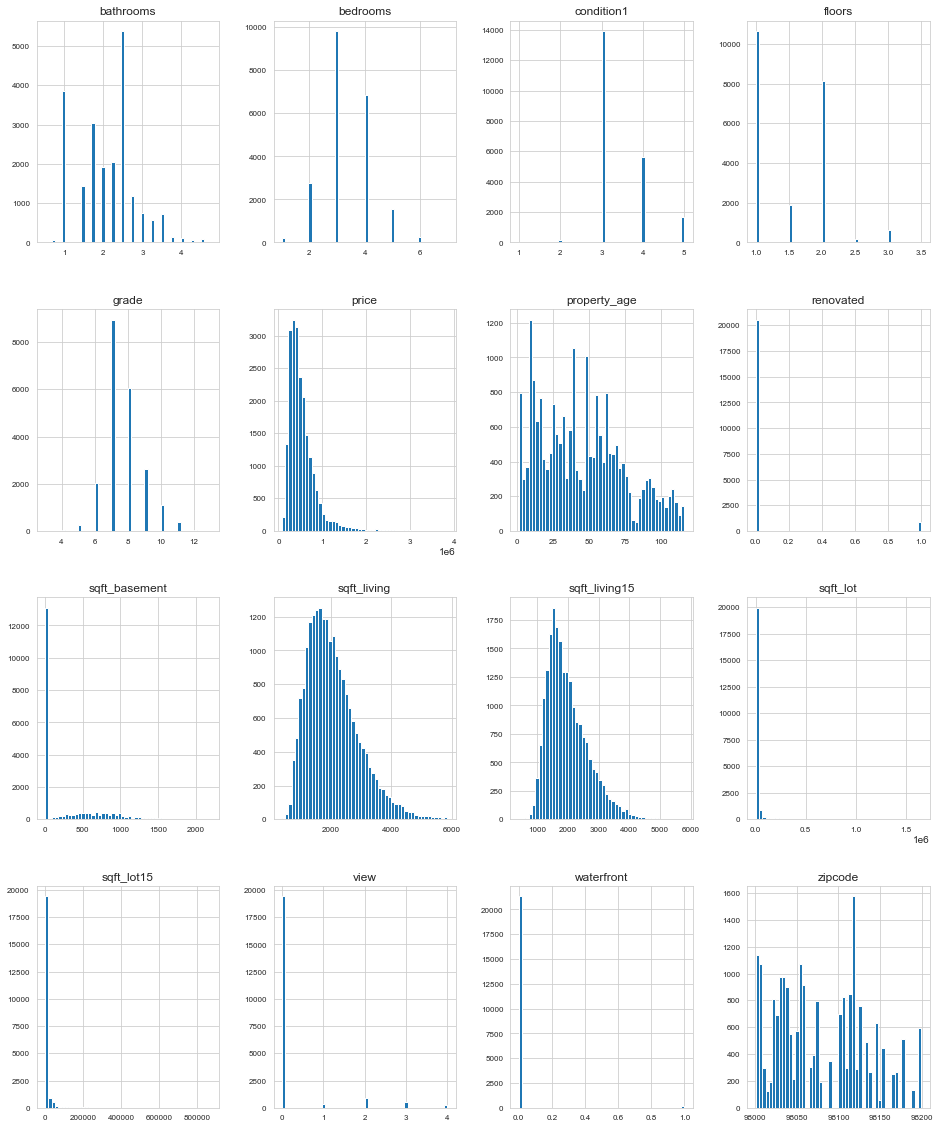

In [36]:
numerical.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 

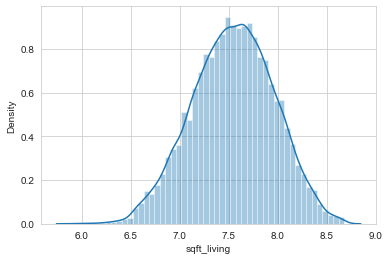

In [37]:
#reducing right-skeweness for sqft_living

df['sqft_living'] = np.log(df['sqft_living'])
sns.distplot(df['sqft_living']);

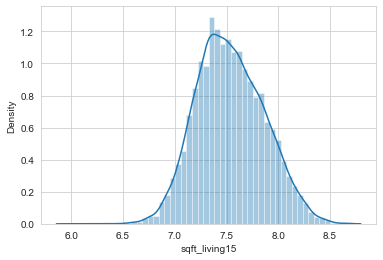

In [38]:
df['sqft_living15'] = np.log(df['sqft_living15'])
sns.distplot(df['sqft_living15']);

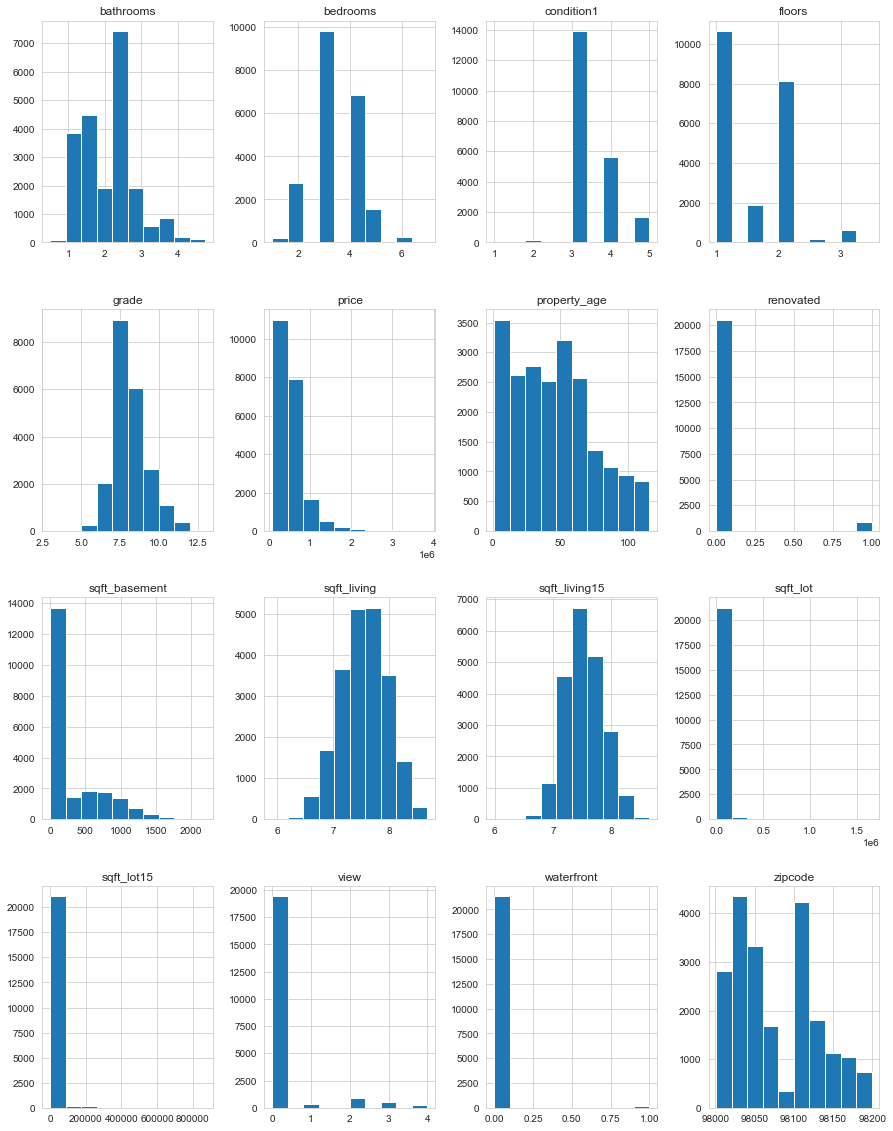

In [39]:
df.hist(figsize = (15,20));

In [40]:
df['zipcode'].unique() 

array([98002, 98166, 98168, 98144, 98178, 98108, 98032, 98055, 98118,
       98122, 98115, 98007, 98034, 98052, 98042, 98040, 98136, 98126,
       98146, 98188, 98059, 98109, 98116, 98103, 98006, 98075, 98024,
       98155, 98003, 98023, 98117, 98177, 98019, 98028, 98092, 98022,
       98070, 98038, 98107, 98106, 98065, 98053, 98072, 98077, 98133,
       98001, 98056, 98045, 98033, 98011, 98014, 98199, 98008, 98031,
       98004, 98074, 98030, 98027, 98029, 98058, 98010, 98005, 98198,
       98148, 98112, 98125, 98105, 98102, 98119, 98039], dtype=int64)

In [41]:
df['zipcode'].min() 

98001

In [42]:
df['zipcode'].max() 

98199

In [43]:
df['zipcode'].max() - df['zipcode'].min() 

198

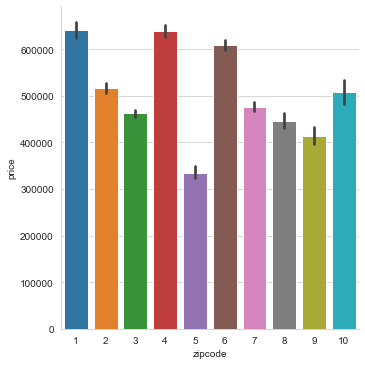

In [44]:
bins= [98001,98020,98040,98060,98080,98100,98120,98140,98160,98180,98200]
labels = ['1', '2', '3','4','5','6','7','8','9','10']
df['zipcode'] = pd.cut(df['zipcode'],bins= bins, labels=labels)


sns.catplot(x="zipcode", y="price", kind="bar", data=df)

In [45]:
df = pd.get_dummies(df, columns=['zipcode'], drop_first=True)
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition1,grade,sqft_basement,sqft_living15,sqft_lot15,price,property_age,renovated,zipcode_2,zipcode_3,zipcode_4,zipcode_5,zipcode_6,zipcode_7,zipcode_8,zipcode_9,zipcode_10
0,6,3.00,7.783224,9373,2.0,0,0,3,7,0,7.630461,7316,280000,25,0,0,0,0,0,0,0,0,0,0
1,6,3.00,7.783224,9373,2.0,0,0,3,7,0,7.630461,7316,300000,25,0,0,0,0,0,0,0,0,0,0
2,4,1.75,7.630461,26036,1.0,0,0,4,8,900,7.859413,21891,647500,69,0,0,0,0,0,0,0,0,1,0
3,3,1.00,7.286192,43000,1.0,0,0,3,7,0,7.718685,20023,400000,64,0,0,0,0,0,0,0,0,1,0
4,3,1.00,7.265430,7599,1.5,0,0,4,6,420,7.162397,10320,235000,86,0,0,0,0,0,0,0,0,1,0


In [46]:
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition1,grade,sqft_basement,sqft_living15,sqft_lot15,price,property_age,renovated,zipcode_2,zipcode_3,zipcode_4,zipcode_5,zipcode_6,zipcode_7,zipcode_8,zipcode_9,zipcode_10
0,6,3.00,7.783224,9373,2.0,0,0,3,7,0,7.630461,7316,280000,25,0,0,0,0,0,0,0,0,0,0
1,6,3.00,7.783224,9373,2.0,0,0,3,7,0,7.630461,7316,300000,25,0,0,0,0,0,0,0,0,0,0
2,4,1.75,7.630461,26036,1.0,0,0,4,8,900,7.859413,21891,647500,69,0,0,0,0,0,0,0,0,1,0
3,3,1.00,7.286192,43000,1.0,0,0,3,7,0,7.718685,20023,400000,64,0,0,0,0,0,0,0,0,1,0
4,3,1.00,7.265430,7599,1.5,0,0,4,6,420,7.162397,10320,235000,86,0,0,0,0,0,0,0,0,1,0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21458 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21458 non-null  int64  
 1   bathrooms      21458 non-null  float64
 2   sqft_living    21458 non-null  float64
 3   sqft_lot       21458 non-null  int64  
 4   floors         21458 non-null  float64
 5   waterfront     21458 non-null  int64  
 6   view           21458 non-null  int64  
 7   condition1     21458 non-null  int64  
 8   grade          21458 non-null  int64  
 9   sqft_basement  21458 non-null  int64  
 10  sqft_living15  21458 non-null  float64
 11  sqft_lot15     21458 non-null  int64  
 12  price          21458 non-null  int64  
 13  property_age   21458 non-null  int64  
 14  renovated      21458 non-null  int32  
 15  zipcode_2      21458 non-null  uint8  
 16  zipcode_3      21458 non-null  uint8  
 17  zipcode_4      21458 non-null  uint8  
 18  zipcod

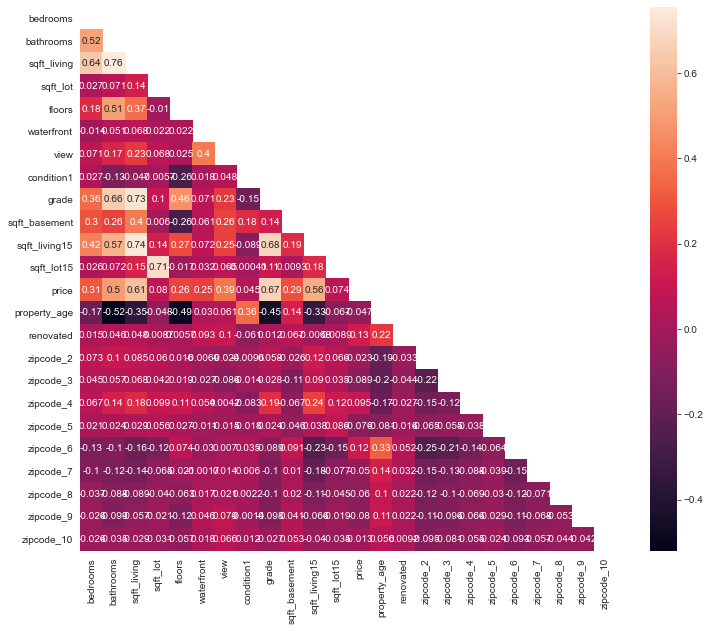

In [48]:
correlations_matrix = df.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(14, 12))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

# Regression Model

In [49]:
y=df['price']
df.drop(['price'], axis =1, inplace=True)
X=df

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
lm_model= LinearRegression()
lm_model.fit(X_train, y_train)

LinearRegression()

In [52]:
predictions = lm_model.predict(X_test)
predictions.shape

(6438,)

In [53]:
MAE = mean_absolute_error(y_test,predictions)
MSE = mean_squared_error(y_test,predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is: 130522.20
The mean squared error of the model in the test set is: 38017672982.47
The root mean squared error of the model in the test set is: 194981.21
The R2 of the model in the test set is: 0.64


In [54]:
def regression_models(model_list):
    for model in model_list:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        r2 = r2_score(y_test, predictions)
        print(model, "model has an R2 score of:", round(r2 * 100, 2))

        fig, ax = plt.subplots(figsize=(9, 9))
        sns.regplot(x=y_test, y=predictions)
        plt.show()  

LinearRegression() model has an R2 score of: 64.05


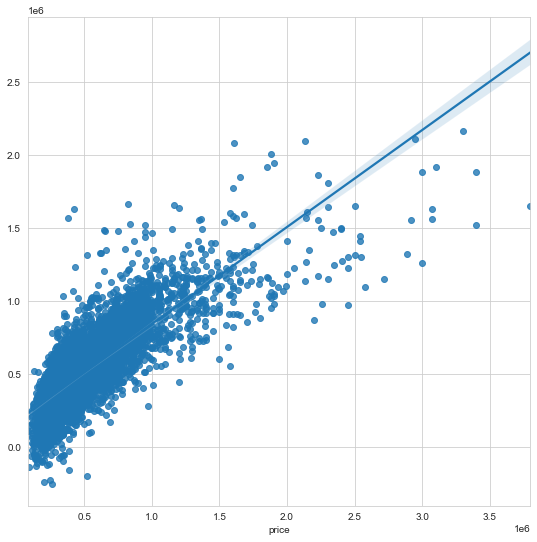

In [55]:
regression_models([lm_model])

In [56]:
from lazypredict.Supervised import LazyRegressor
             
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [02:59<00:00,  4.26s/it]


In [57]:
display(models)

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.77,0.77,156046.69,0.24
ExtraTreesRegressor,0.77,0.77,157210.14,5.11
XGBRegressor,0.76,0.76,158384.47,1.71
HistGradientBoostingRegressor,0.76,0.76,158729.85,1.46
RandomForestRegressor,0.76,0.76,160481.83,7.26
GradientBoostingRegressor,0.74,0.74,165094.58,1.95
BaggingRegressor,0.73,0.73,168067.68,0.76
PoissonRegressor,0.71,0.71,175556.90,0.05
KNeighborsRegressor,0.68,0.68,183169.57,2.37
